# Problem Statment:-
- We have to predict the price of house with the help of given features like Sqft, Floor, TotalFloor, Bedroom, Living.Room, Bathroom etc..

In [1]:
# Importing libraires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
data = pd.read_csv('house_rental_data.csv (1).txt')
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.shape

(645, 8)

# Observation:-
- There are 645 rows and 8 columns in given dataset.
- Each row have individual inforation about house.

In [4]:
# Checking for null values in dataset
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

There is no null value in dataset.

In [5]:
# Removing unessary column
data.drop('Unnamed: 0',1,inplace=True)

In [6]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [7]:
# data informatin
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [8]:
# data summary
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [9]:
# Checking for outliers in dataset
data.skew()

Sqft           1.427424
Floor          1.378214
TotalFloor     0.964188
Bedroom       -0.049651
Living.Room   -1.181956
Bathroom       0.990518
Price          1.837773
dtype: float64

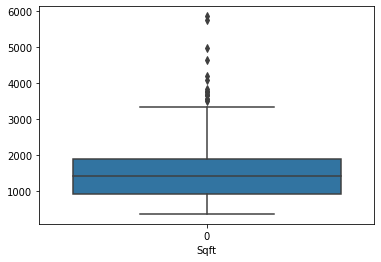

In [10]:
# Visulazing outliers in different columns
sns.boxplot(data['Sqft'])
plt.xlabel("Sqft")
plt.show()

<AxesSubplot:>

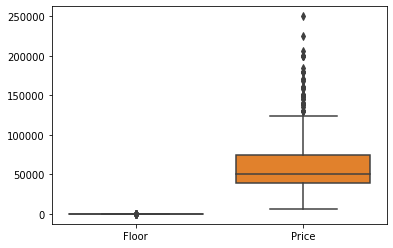

In [11]:
sns.boxplot(data[['Floor','Price']])

In [12]:
# Outlier treatment for Sqft 
def Outlier_treatment(data):
    for col in data.columns:
        q3 = data[col].quantile(0.75)
        q1 = data[col].quantile(0.25)
        iqr = q3-q1
        uw = q3 + 1.5*iqr
        lw = q1 - 1.5*iqr
        data[col] = np.where(data[col]>uw,data[col].quantile(0.85),data[col])
        data[col] = np.where(data[col]<lw,data[col].quantile(0.85),data[col])        

In [13]:
df = data[['Sqft','Floor','Price']]

In [14]:
# Removing Outliers from dataset
Outlier_treatment(df)

In [15]:
data[['Sqft','Floor','Price']] = df

In [16]:
# Again checking for the outliers 
data.skew()

Sqft           0.553256
Floor          0.691656
TotalFloor     0.964188
Bedroom       -0.049651
Living.Room   -1.181956
Bathroom       0.990518
Price          0.644020
dtype: float64

All Outliers have been fixed from dataset.

# Applying Feature Scaling to dataset


In [17]:
# Columns for feature scaling 
col_for_scaling = ['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']

In [18]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [19]:
# fitting the data
data[col_for_scaling] = mms.fit_transform(data[col_for_scaling])
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,0.276110,0.071429,0.162162,0.166667,0.5,0.4,62000.0
1,0.599040,0.285714,0.162162,0.500000,0.5,0.4,78000.0
2,0.262905,0.285714,0.162162,0.166667,0.5,0.2,58000.0
3,0.370948,0.071429,0.162162,0.333333,0.5,0.4,45000.0
4,0.205282,0.714286,0.351351,0.333333,0.5,0.4,45000.0


# Seperating x and y from dataset

In [20]:
x = data.drop('Price',1)
y = data['Price']

# Spliting train and test set

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

# Importing LinearRegression 

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr 

LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

# Predicting value on x_test

In [24]:
y_pred = lr.predict(x_test)
y_pred

array([ 96624.47354459,  36853.74437388,  73708.86239185,  75451.8714783 ,
        32907.89208578,  95393.03033318, 105812.13769334,  62633.78335664,
        55381.28767646,  41845.70185642,  51559.39500576,  38006.41710088,
        24718.38201799,  55937.46309388,  48630.07662215,  76698.75349863,
        43705.02691082,  42188.80976577,  60635.37248821,  52153.30148402,
        28895.57186791,  90748.9042735 ,  71881.80866311,  76286.97154375,
        62878.33966726,  77408.49607047,  71732.87916116,  57599.4778491 ,
        69831.72779757,  57374.62115138,  80528.30775063,  34582.22541941,
        72880.04642529,  90517.01472654,  52455.67831247,  34023.45917067,
        63586.21264441,  67824.40509454,  57598.07645792,  56925.20832443,
        50715.87873214,  45057.35333917,  72562.25469668,  53711.43032678,
        74061.31276832,  48551.6802298 ,  64542.81526822,  32829.91816924,
        84182.56283187,  66910.51073631,  86274.36251701,  61160.21688451,
        38006.41710088,  

In [25]:
x_test

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
352,0.743097,0.642857,0.432432,0.500000,0.50,0.6
530,0.214886,0.071429,0.108108,0.333333,0.50,0.2
315,0.452581,0.857143,0.540541,0.166667,0.50,0.4
249,0.600240,0.357143,0.162162,0.333333,0.50,0.4
266,0.103241,0.357143,0.162162,0.000000,0.25,0.2
...,...,...,...,...,...,...
440,0.030012,0.071429,0.297297,0.000000,0.25,0.2
239,0.555822,0.142857,0.162162,0.500000,0.50,0.4
501,0.899160,0.571429,0.324324,0.333333,0.50,0.4
34,0.169268,0.285714,0.297297,0.166667,0.50,0.2


In [26]:
# finding value of m 
m = lr.coef_
m

array([81234.42000663,  9526.24446993, 13055.02127699, -3294.77574264,
       -2391.26879729, 19333.2297487 ])

In [27]:
# finding value of c
c = lr.intercept_
c

15733.055846758383

In [28]:
# Checking error 
from sklearn.metrics import mean_squared_error
mse =np.sqrt( mean_squared_error(y_pred,y_test))
mse

14656.816237732628

In [29]:
# Checking accuracy of our model
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.4446192671494841

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=10)

array([0.62845092, 0.6557626 , 0.60185633, 0.49237069, 0.61861557,
       0.60922277, 0.70040355, 0.54054285, 0.6804616 , 0.65768696])

# Observation :
- The highest accuracy acheived by Linear regression on this dataset is of 70.04%.
- And the lowest accuracy acheived by LR on this dataset is 44.46%.